# Linear regression

**see extra readings/ Linear Regression.pdf**

Mean Squared Error:

$$MSE(\beta) = \frac{1}{n}\sum_{i=1}^{n}e_i^2(\beta) $$

Which can be represented in matrix form 
$$\frac{1}{n}e^Te $$

Since
$$MSE(\beta) = \begin{bmatrix}e_1 e_2... e_n  \end{bmatrix} \begin{bmatrix}e_1\\ e_2\\ .\\.\\.\\ e_n \end{bmatrix} $$

Minimizing the MSE

$$\hat{\beta}=(x^Tx)^{-1}x^Ty $$

Create data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x = 2 * np.random.rand(100,1)
y = 4 +3 * x+np.random.randn(100,1)

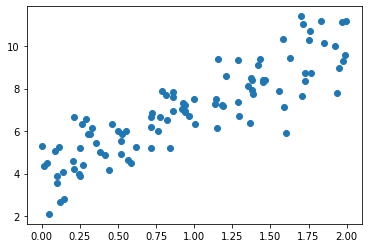

In [14]:
plt.scatter(x, y)

build regression class

In [16]:
def linear_regression(x, y):
    result = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return result

result = linear_regression(x, y)
y_hat = x.dot(result)
print(result)

[[6.07728867]]


plot result

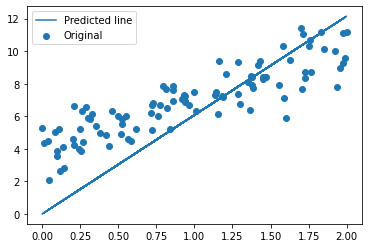

In [17]:
plt.scatter(x, y, label='Original')
plt.plot(x, y_hat, label='Predicted line')
plt.legend()

## Gradient Descent

$$ \theta = \theta - \alpha(1/m \sum_{i=1}^m (h(\theta^i - y^i)X_j) $$

where $\alpha$ is Learning Rate

In [45]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
        

[[-2.65809484]
 [-0.51257682]]


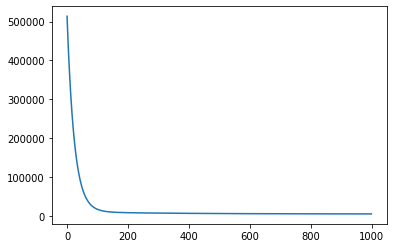

In [46]:
lr = 0.01
n_iter = 1000
# theta0 and theta 1
theta = np.random.randn(2, 1)
print(theta)
x_b = np.c_[np.ones((len(x),1)),x]
theta,cost_history,theta_history = gradient_descent(x_b ,y, theta,lr,n_iter)

plt.plot(cost_history)

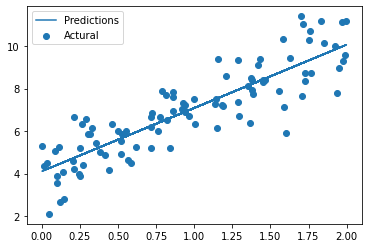

In [35]:
y_hat = x_b.dot(theta)
plt.plot(x, y_hat, label='Predictions')
plt.scatter(x, y, label="Actural")
plt.legend()

In [47]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

# Logistic Regression

**https://towardsdatascience.com/understanding-logistic-regression-81779525d5c6**

Logistic Regression is a Linear Classifier

We have sigmoid function defined as follow

$$S(x) = \frac{1}{1+e^{-x}} $$

And we can replace it as

$$S(xw) =\hat{y} $$
$$\to \frac{1}{1+e^{-xw}}=\hat{y} $$
$$\to 1+e^{-xw} = \frac{1}{\hat{y}} $$
$$ \to e^{-xw} = \frac{1}{\hat{y}} -1 $$
$$\to xw = -ln(\frac{1}{\hat{y}} - 1)$$

where $\hat{y}$ is the prediction value

Then we can replace the linear regression expression with by using the equation above
$$\hat{\beta}=(x^Tx)^{-1}x^Ty $$
1. $$\to \hat{\beta} = -(x^Tx)^{-1}x^Tln(\frac{1}{\hat{y}} - 1))$$

2. $$\nabla f = 2x^T(xw + ln(\frac{1}{y} - 1)) $$

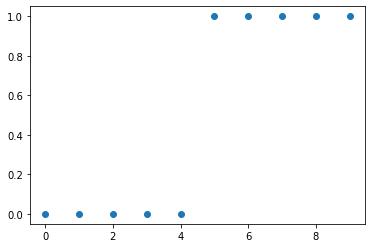

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape((-1, 1))
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
plt.scatter(x, y)

In [ ]:
class LogisticRegression:
    EPS = 1e-5

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def logistic(self):
        x = self.x
        y = self.y
        y = np.maximum(self.EPS, np.minimum(y, 1-self.EPS) )
        w = -np.linalg.inv(x.T.dot(x)).dot(x.T).dot(np.log(np.divide(1, y) - 1))
        return w

    def gradient(self):
        w = self.logistic()
        x = self.x
        y = self.y
        y = np.maximum(self.EPS, np.minimum(y, 1-self.EPS) )
        result = 2 * x.T.dot(x.dot(w) + np.log(1/y -1 ))
        return result

    def predict(self, x):
        w = self.logistic()

        return self.sigmoid(x.dot(w))

In [ ]:
model = LogisticRegression(x, y)
print(model.logistic())
print(model.gradient())

[1.00990487]
[1.42108547e-14]


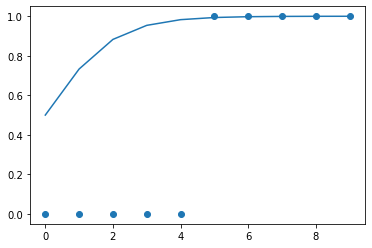

In [ ]:
y_hat = model.predict(x)
plt.plot(x, y_hat)
plt.scatter(x, y)

# Softmax

cross entropy

$$- \sum T * log(O)  $$

In [ ]:
from sklearn.preprocessing import OneHotEncoder

y = np.array([0, 1, 2, 2])
y = OneHotEncoder(sparse=False).fit_transform(y.reshape(-1, 1))

x = np.array([[0.1, 0.5],
              [1.1, 2.3],
              [-1.1, -2.3],
              [-1.5, -2.5]])

w = np.array([[0.1, 0.2, 0.3],
              [0.1, 0.2, 0.3]])

print(f"x: {x}")
print(f"y: {y}")
print(f"w: {w}")

x: [[ 0.1  0.5]
 [ 1.1  2.3]
 [-1.1 -2.3]
 [-1.5 -2.5]]
y: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
w: [[0.1 0.2 0.3]
 [0.1 0.2 0.3]]


In [ ]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T


def net(x, w):
    z = x.dot(w)
    return softmax(z)

def cross_entropy(predicted, actual):
    return - np.sum(np.log(predicted   ).dot(actual), axis=1)

In [ ]:
prediction = net(x, w)
print(prediction)

[[0.31354514 0.33293369 0.35352116]
 [0.22837175 0.32085034 0.45077791]
 [0.45077791 0.32085034 0.22837175]
 [0.47177622 0.31624106 0.21198272]]


In [ ]:
cross_entropy(prediction, y)

array([1.15981193, 1.1367805 , 1.4767805 , 1.55125051])